In [ ]:
!pip install -q contractions nltk scikit-learn

import pandas as pd
import re
import contractions
import nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.0 MB/s eta 0:00:00


In [ ]:
# Load Data

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.head(5)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
train_df.tail(5)

,Class Index,Title,Description
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999,2,Nets get Carter from Raptors,INDIANAPOLIS -- All-Star Vince Carter was trad...


In [ ]:
test_df.head(5)

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [ ]:
test_df.tail(5)

,Class Index,Title,Description
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...
7599,3,EBay gets into rentals,EBay plans to buy the apartment and home renta...


In [ ]:
import pandas as pd

# Create comparison dataframe
comparison = pd.DataFrame({
    'Train Count': train_df['Class Index'].value_counts().sort_index(),
    'Train %': train_df['Class Index'].value_counts(normalize=True).sort_index() * 100,
    'Test Count': test_df['Class Index'].value_counts().sort_index(),
    'Test %': test_df['Class Index'].value_counts(normalize=True).sort_index() * 100
})

print(comparison)

             Train Count  Train %  Test Count  Test %
Class Index                                          
1                  30000     25.0        1900    25.0
2                  30000     25.0        1900    25.0
3                  30000     25.0        1900    25.0
4                  30000     25.0        1900    25.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
train_df.describe()

,Class Index
count,120000.000000
mean,2.500000
std,1.118039
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


**Check Missing Value**

In [ ]:
print(train_df.isnull().sum())

Class Index    0
Title          0
Description    0
dtype: int64


In [ ]:
print(test_df.isnull().sum())

Class Index    0
Title          0
Description    0
dtype: int64


**Preprocessing**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess(text):
    if pd.isna(text) or text == '':
        return ''
    text = str(text).lower()
    text = re.sub(r'http\S+|www\.\S+', '', text)      # remove urls
    text = re.sub(r'<.*?>', '', text)                 # remove html
    text = contractions.fix(text)                     # expand contractions
    text = re.sub(r"'s\b", '', text)                  # remove possessives
    text = re.sub(r"'", '', text)                     # remove remaining apostrophes
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)          # remove special chars & numbers
    text = ' '.join(text.split())                     # remove extra spaces

    # Remove stopwords
    tokens = text.split()
    text = ' '.join([word for word in tokens if word not in stop_words])

    return text

In [ ]:
train_df['original'] = train_df['Description']
train_df['cleaned'] = train_df['Description'].apply(preprocess)

display(train_df[['original', 'cleaned']].head(5))

,original,cleaned
0,"Reuters - Short-sellers, Wall Street's dwindli...",reuters short sellers wall street dwindling ba...
1,Reuters - Private investment firm Carlyle Grou...,reuters private investment firm carlyle group ...
2,Reuters - Soaring crude prices plus worries\ab...,reuters soaring crude prices plus worries econ...
3,Reuters - Authorities have halted oil export\f...,reuters authorities halted oil export flows ma...
4,"AFP - Tearaway world oil prices, toppling reco...",afp tearaway world oil prices toppling records...


In [ ]:
test_df['original'] = test_df['Description']
test_df['cleaned'] = test_df['Description'].apply(preprocess)

display(test_df[['original', 'cleaned']].head(5))

,original,cleaned
0,Unions representing workers at Turner Newall...,unions representing workers turner newall say ...
1,"SPACE.com - TORONTO, Canada -- A second\team o...",space com toronto canada second team rocketeer...
2,AP - A company founded by a chemistry research...,ap company founded chemistry researcher univer...
3,AP - It's barely dawn when Mike Fitzpatrick st...,ap barely dawn mike fitzpatrick starts shift b...
4,AP - Southern California's smog-fighting agenc...,ap southern california smog fighting agency we...


**Tokenisation**

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
train_df['tokenized'] = train_df['cleaned'].apply(lambda x:
                                   word_tokenize(x) if x else [])

In [ ]:
display(train_df[['cleaned', 'tokenized']].head(5))

,cleaned,tokenized
0,reuters short sellers wall street dwindling ba...,"[reuters, short, sellers, wall, street, dwindl..."
1,reuters private investment firm carlyle group ...,"[reuters, private, investment, firm, carlyle, ..."
2,reuters soaring crude prices plus worries econ...,"[reuters, soaring, crude, prices, plus, worrie..."
3,reuters authorities halted oil export flows ma...,"[reuters, authorities, halted, oil, export, fl..."
4,afp tearaway world oil prices toppling records...,"[afp, tearaway, world, oil, prices, toppling, ..."


In [ ]:
test_df['tokenized'] = test_df['cleaned'].apply(lambda x:
                                   word_tokenize(x) if x else [])

In [ ]:
display(test_df[['cleaned', 'tokenized']].head(5))

,cleaned,tokenized
0,unions representing workers turner newall say ...,"[unions, representing, workers, turner, newall..."
1,space com toronto canada second team rocketeer...,"[space, com, toronto, canada, second, team, ro..."
2,ap company founded chemistry researcher univer...,"[ap, company, founded, chemistry, researcher, ..."
3,ap barely dawn mike fitzpatrick starts shift b...,"[ap, barely, dawn, mike, fitzpatrick, starts, ..."
4,ap southern california smog fighting agency we...,"[ap, southern, california, smog, fighting, age..."


**POS-Lemmatisation**

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

lemmatizer = WordNetLemmatizer()

def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,   # adjective
        'N': wordnet.NOUN,  # noun
        'V': wordnet.VERB,  # verb
        'R': wordnet.ADV    # adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize(tokens):
    return [lemmatizer.lemmatize(token, get_pos(token)) for token in tokens]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
train_df['lemmatized'] = train_df['tokenized'].apply(lemmatize)
comparison_df = train_df[['tokenized', 'lemmatized']].head(5)
display(comparison_df)

,tokenized,lemmatized
0,"[reuters, short, sellers, wall, street, dwindl...","[reuters, short, seller, wall, street, dwindle..."
1,"[reuters, private, investment, firm, carlyle, ...","[reuters, private, investment, firm, carlyle, ..."
2,"[reuters, soaring, crude, prices, plus, worrie...","[reuters, soar, crude, price, plus, worry, eco..."
3,"[reuters, authorities, halted, oil, export, fl...","[reuters, authority, halt, oil, export, flow, ..."
4,"[afp, tearaway, world, oil, prices, toppling, ...","[afp, tearaway, world, oil, price, topple, rec..."


In [ ]:
test_df['lemmatized'] = test_df['tokenized'].apply(lemmatize)
comparison_df = test_df[['tokenized', 'lemmatized']].head(5)
display(comparison_df)

,tokenized,lemmatized
0,"[unions, representing, workers, turner, newall...","[union, represent, worker, turner, newall, say..."
1,"[space, com, toronto, canada, second, team, ro...","[space, com, toronto, canada, second, team, ro..."
2,"[ap, company, founded, chemistry, researcher, ...","[ap, company, found, chemistry, researcher, un..."
3,"[ap, barely, dawn, mike, fitzpatrick, starts, ...","[ap, barely, dawn, mike, fitzpatrick, start, s..."
4,"[ap, southern, california, smog, fighting, age...","[ap, southern, california, smog, fight, agency..."


In [ ]:
# Text Joining
train_df['processed_text'] = train_df['lemmatized'].apply(lambda x: ' '.join(x))

test_df['processed_text'] = test_df['lemmatized'].apply(lambda x: ' '.join(x))

In [ ]:
# Generate TF-IDF Vectors
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = train_df['processed_text']
X_test = test_df['processed_text']
y_train = train_df['Class Index']
y_test = test_df['Class Index']

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize TF-IDF vectorizers for unigrams and bigrams specifically for keyword extraction
tfidf_unigram = TfidfVectorizer(ngram_range=(1, 1), stop_words='english', max_features=5000)
tfidf_bigram = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', max_features=5000)

tfidf_unigram.fit(X_train)
tfidf_bigram.fit(X_train)

TfidfVectorizer(max_features=5000, ngram_range=(2, 2), stop_words='english')

In [ ]:
# Get feature names
feature_names = tfidf.get_feature_names_out()

# Show first 3 articles
n_docs = 3

for i in range(n_docs):
    print(f"\nArticle {i+1}:")

    # Get TF-IDF scores
    tfidf_scores = X_train_tfidf[i].toarray().flatten()

    # Get top 10 words
    top_indices = tfidf_scores.argsort()[-10:][::-1]

    # Create mini dataframe
    top_words = [feature_names[j] for j in top_indices]
    top_values = [round(tfidf_scores[j], 3) for j in top_indices]

    mini_df = pd.DataFrame([top_values], columns=top_words, index=[f'Article {i+1}'])
    display(mini_df)


Article 1:


,ultra,seller,band,green,short,wall street,wall,see,street,reuters
Article 1,0.426,0.407,0.372,0.312,0.304,0.285,0.278,0.266,0.264,0.16



Article 2:


,reputation,quietly,bet,controversial,private,investment,defense,place,firm,part
Article 2,0.323,0.319,0.309,0.274,0.255,0.244,0.236,0.222,0.213,0.209



Article 3:


,depth,crude price,hang,stock market,plus,soar,summer,worry,outlook,next week
Article 3,0.315,0.31,0.284,0.265,0.257,0.249,0.24,0.24,0.238,0.236


In [ ]:
# Train Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 90.42%

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      1900
           2       0.95      0.97      0.96      1900
           3       0.87      0.86      0.87      1900
           4       0.87      0.88      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



<Figure size 800x600 with 0 Axes>

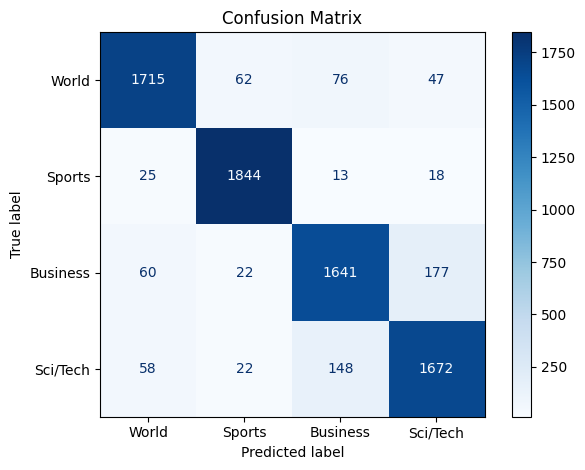

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['World', 'Sports', 'Business', 'Sci/Tech'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
!pip install keybert

from keybert import KeyBERT
from sklearn.feature_extraction.text import CountVectorizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.9 MB/s eta 0:00:00


In [ ]:
# Initialize
kw_model = KeyBERT(model='all-mpnet-base-v2')

def extract_keywords(text, top_n=5):
    keywords = kw_model.extract_keywords(
        text,
        keyphrase_ngram_range=(1, 2),
        stop_words='english',
        top_n=top_n,
        use_mmr=True,
        diversity=0.7,  # Increased diversity
        vectorizer=CountVectorizer(ngram_range=(1, 2), stop_words='english')
    )
    return [kw[0].title() for kw in keywords]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT(model='all-mpnet-base-v2')

def extract_keywords(text, top_n=5):
    # Get bigrams first
    bigrams = kw_model.extract_keywords(
        text,
        keyphrase_ngram_range=(2, 2),
        stop_words='english',
        top_n=3,
        use_mmr=True,
        diversity=0.7
    )

    # Get unigrams
    unigrams = kw_model.extract_keywords(
        text,
        keyphrase_ngram_range=(1, 1),
        stop_words='english',
        top_n=5,
        use_mmr=True,
        diversity=0.7
    )

    # Combine: bigrams first, then fill with unigrams
    keywords = []
    used_words = set()

    for kw, score in bigrams:
        if len(keywords) >= top_n:
            break
        words = kw.lower().split()
        if not any(w in used_words for w in words):
            keywords.append(kw.title())
            used_words.update(words)

    for kw, score in unigrams:
        if len(keywords) >= top_n:
            break
        if kw.lower() not in used_words:
            keywords.append(kw.title())
            used_words.add(kw.lower())

    return keywords

# Test
texts = [
    "Reuters - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again.",
    "Artificial intelligence and machine learning technology in classroom"
]

for text in texts:
    print(f"{text}")
    print(f"{extract_keywords(text, 5)}\n")

Reuters - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again.
['Seeing Green', 'Reuters Short', 'Ultra Cynics', 'Sellers']

Artificial intelligence and machine learning technology in classroom
['Intelligence Machine', 'Technology Classroom', 'Learning', 'Artificial']



In [ ]:
def simple_accuracy_test():
    test_cases = [
        {
            "text": "Artificial intelligence and machine learning technology in classroom",
            "must_have": ["artificial intelligence", "machine learning"]  # Keywords that MUST appear
        },
        {
            "text": "The stock market crashed due to inflation concerns",
            "must_have": ["stock market", "inflation"]
        },
        {
            "text": "Scientists discover new vaccine for cancer treatment",
            "must_have": ["vaccine", "cancer"]
        },
        {
            "text": "Football championship finals held in London stadium",
            "must_have": ["football", "championship"]
        },
        {
            "text": "Apple releases new iPhone with advanced camera features",
            "must_have": ["iphone", "apple", "camera"]
        }
    ]

    correct = 0
    total = 0

    print("SIMPLE ACCURACY TEST")
    print("=" * 60)

    for i, case in enumerate(test_cases):
        predicted = extract_keywords(case["text"], top_n=5)
        predicted_lower = [p.lower() for p in predicted]

        found = []
        for must in case["must_have"]:
            total += 1
            if any(must in p or p in must for p in predicted_lower):
                correct += 1
                found.append(must)

        print(f"\nTest {i+1}: {case['text'][:50]}...")
        print(f"  Must have: {case['must_have']}")
        print(f"  Predicted: {predicted}")
        print(f"  Found: {found}")

    accuracy = correct / total * 100
    print("\n" + "=" * 60)
    print(f"ACCURACY: {correct}/{total} = {accuracy:.1f}%")

    return accuracy

simple_accuracy_test()


SIMPLE ACCURACY TEST

Test 1: Artificial intelligence and machine learning techn...
  Must have: ['artificial intelligence', 'machine learning']
  Predicted: ['Intelligence Machine', 'Technology Classroom', 'Learning', 'Artificial']
  Found: ['artificial intelligence', 'machine learning']

Test 2: The stock market crashed due to inflation concerns...
  Must have: ['stock market', 'inflation']
  Predicted: ['Market Crashed', 'Inflation Concerns', 'Stock']
  Found: ['stock market', 'inflation']

Test 3: Scientists discover new vaccine for cancer treatme...
  Must have: ['vaccine', 'cancer']
  Predicted: ['Vaccine Cancer', 'Discover New', 'Scientists']
  Found: ['vaccine', 'cancer']

Test 4: Football championship finals held in London stadiu...
  Must have: ['football', 'championship']
  Predicted: ['London Stadium', 'Championship Finals', 'Held']
  Found: ['championship']

Test 5: Apple releases new iPhone with advanced camera fea...
  Must have: ['iphone', 'apple', 'camera']
  Predicted

81.81818181818183

In [ ]:
# EXPORT TO model.h FOR ESP32
import numpy as np
from google.colab import files

def export_to_header(tfidf, model, filename="model.h", max_features=300):
    """Export TF-IDF + Logistic Regression + Keywords to C header file"""

    feature_names = list(tfidf.get_feature_names_out())
    idf = tfidf.idf_
    coef = model.coef_
    intercept = model.intercept_

    # Limit features for ESP32 memory
    if len(feature_names) > max_features:
        importance = np.abs(coef).sum(axis=0)
        top_indices = importance.argsort()[-max_features:][::-1]
        top_indices = np.sort(top_indices)

        feature_names = [feature_names[i] for i in top_indices]
        idf = idf[top_indices]
        coef = coef[:, top_indices]

    vocab_size = len(feature_names)
    num_classes = len(model.classes_)

    with open(filename, 'w') as f:
        f.write("// =====================================================\n")
        f.write("// Auto-generated model for ESP32\n")
        f.write("// Text Classification + Keyword Extraction\n")
        f.write("// =====================================================\n\n")
        f.write("#ifndef MODEL_H\n")
        f.write("#define MODEL_H\n\n")
        f.write("#include <string.h>\n")
        f.write("#include <ctype.h>\n")
        f.write("#include <math.h>\n\n")

        f.write("#define MAX_TEXT_LEN 512\n")
        f.write("#define MAX_KEYWORDS 5\n\n")

        f.write("const char* CATEGORIES[] = {\"World\", \"Sports\", \"Business\", \"Sci-Tech\"};\n")
        f.write(f"const int NUM_CLASSES = {num_classes};\n\n")

        f.write(f"const int VOCAB_SIZE = {vocab_size};\n")
        f.write("const char* VOCAB[] = {\n")
        for i, word in enumerate(feature_names):
            word_escaped = word.replace('"', '\\"')
            comma = "," if i < vocab_size - 1 else ""
            f.write(f'    "{word_escaped}"{comma}\n')
        f.write("};\n\n")

        f.write("const float IDF[] = {\n    ")
        idf_strs = [f"{x:.4f}f" for x in idf]
        for i in range(0, len(idf_strs), 8):
            f.write(", ".join(idf_strs[i:i+8]))
            if i + 8 < len(idf_strs):
                f.write(",\n    ")
        f.write("\n};\n\n")

        f.write("const float INTERCEPT[] = {")
        f.write(", ".join([f"{x:.6f}f" for x in intercept]))
        f.write("};\n\n")

        f.write(f"const float COEF[{num_classes}][VOCAB_SIZE] = {{\n")
        for c in range(num_classes):
            f.write("    {")
            coef_strs = [f"{x:.6f}f" for x in coef[c]]
            for i in range(0, len(coef_strs), 8):
                if i > 0:
                    f.write("\n     ")
                f.write(", ".join(coef_strs[i:i+8]))
                if i + 8 < len(coef_strs):
                    f.write(",")
            comma = "," if c < num_classes - 1 else ""
            f.write(f"}}{comma}\n")
        f.write("};\n\n")

        f.write("""void preprocessText(char* text) {
    int j = 0;
    for (int i = 0; text[i]; i++) {
        char c = text[i];
        if (isalpha(c) || c == ' ') {
            text[j++] = tolower(c);
        } else {
            text[j++] = ' ';
        }
    }
    text[j] = '\\0';
    j = 0;
    int lastSpace = 1;
    for (int i = 0; text[i]; i++) {
        if (text[i] == ' ') {
            if (!lastSpace) { text[j++] = ' '; lastSpace = 1; }
        } else {
            text[j++] = text[i]; lastSpace = 0;
        }
    }
    if (j > 0 && text[j-1] == ' ') j--;
    text[j] = '\\0';
}

int findTerm(const char* text, const char* term) {
    int textLen = strlen(text);
    int termLen = strlen(term);
    for (int i = 0; i <= textLen - termLen; i++) {
        if (strncmp(text + i, term, termLen) == 0) {
            int startOk = (i == 0 || text[i - 1] == ' ');
            int endOk = (text[i + termLen] == '\\0' || text[i + termLen] == ' ');
            if (startOk && endOk) return 1;
        }
    }
    return 0;
}

int predictCategory(const char* inputText) {
    char text[MAX_TEXT_LEN];
    strncpy(text, inputText, MAX_TEXT_LEN - 1);
    text[MAX_TEXT_LEN - 1] = '\\0';
    preprocessText(text);

    float scores[NUM_CLASSES];
    for (int c = 0; c < NUM_CLASSES; c++) scores[c] = INTERCEPT[c];

    for (int i = 0; i < VOCAB_SIZE; i++) {
        if (findTerm(text, VOCAB[i])) {
            for (int c = 0; c < NUM_CLASSES; c++) scores[c] += COEF[c][i];
        }
    }

    int best = 0;
    for (int c = 1; c < NUM_CLASSES; c++) {
        if (scores[c] > scores[best]) best = c;
    }
    return best;
}

int extractKeywords(const char* inputText, const char* keywords[], int topN) {
    char text[MAX_TEXT_LEN];
    strncpy(text, inputText, MAX_TEXT_LEN - 1);
    text[MAX_TEXT_LEN - 1] = '\\0';
    preprocessText(text);

    if (topN > MAX_KEYWORDS) topN = MAX_KEYWORDS;

    float scores[VOCAB_SIZE];
    for (int i = 0; i < VOCAB_SIZE; i++) {
        scores[i] = findTerm(text, VOCAB[i]) ? IDF[i] : 0;
    }

    int found = 0;
    for (int k = 0; k < topN; k++) {
        int best = -1;
        float bestScore = 0;
        for (int i = 0; i < VOCAB_SIZE; i++) {
            if (scores[i] > bestScore) { bestScore = scores[i]; best = i; }
        }
        if (best >= 0 && bestScore > 0) {
            keywords[found++] = VOCAB[best];
            scores[best] = 0;
        }
    }
    return found;
}

""")
        f.write("#endif\n")

    print(f"✅ Exported to {filename}")
    print(f"   Vocabulary: {vocab_size} terms")
    print(f"   Classes: {num_classes}")

# Export and download
export_to_header(tfidf, model, "model.h", max_features=300)
files.download("model.h")

✅ Exported to model.h
   Vocabulary: 300 terms
   Classes: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>